https://thegymter.net/2023/08/28/2023-u-s-championships-results/

The 2023 U.S. Championships were held from August 24 through August 27 in San Jose, California.

Senior All-Around Results

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('scraped_data.csv')

In [7]:
df.head()

,Rank,Athlete,Club,VT,UB,BB,FX,AA,VT2,UB2,BB2,FX2,AA2,VT_total,UB_total,BB_ttoal,FX_total,AA_total
0,1,Simone Biles,World Champions,15.70,14.35,14.45,14.80,59.30,14.85,14.05,14.85,15.40,59.15,30.55,28.40,29.30,30.20,118.45
1,2,Shilese Jones,Ascend Gymnastics,14.35,14.90,13.45,14.05,56.75,14.40,15.00,14.30,14.10,57.80,28.75,29.90,27.75,28.15,114.55
2,3,Leanne Wong,Florida,14.25,14.00,13.75,13.35,55.35,14.05,14.00,13.70,14.00,55.75,28.30,28.00,27.45,27.35,111.10
3,4,Skye Blakely,WOGA,14.35,14.40,14.05,12.90,55.70,14.25,14.40,14.20,12.20,55.05,28.60,28.80,28.25,25.10,110.75
4,5,Jordan Chiles,World Champions,14.30,14.20,13.00,13.10,54.60,14.25,12.95,12.10,13.85,53.15,28.55,27.15,25.10,26.95,107.75


In [14]:
# Find the name and score of the person with the highest value in each column
max_names = {}
for column in df.columns[3:]:
    max_index = df[column].idxmax()
    max_names[column] = (df.loc[max_index, 'Athlete'], df.loc[max_index, column])

# Print the results
for column, (athlete, value) in max_names.items():
    print(f"Column: {column}, Athlete: {athlete}, Value: {value}")


Column: VT, Athlete: Simone Biles, Value: 15.7
Column: UB, Athlete: Shilese Jones, Value: 14.9
Column: BB, Athlete: Simone Biles, Value: 14.45
Column: FX, Athlete: Simone Biles, Value: 14.8
Column: AA, Athlete: Simone Biles, Value: 59.3
Column: VT2, Athlete: Simone Biles, Value: 14.85
Column: UB2, Athlete: Shilese Jones, Value: 15.0
Column: BB2, Athlete: Simone Biles, Value: 14.85
Column: FX2, Athlete: Simone Biles, Value: 15.4
Column: AA2, Athlete: Simone Biles, Value: 59.15
Column: VT_total, Athlete: Simone Biles, Value: 30.55
Column: UB_total, Athlete: Shilese Jones, Value: 29.9
Column: BB_ttoal, Athlete: Simone Biles, Value: 29.3
Column: FX_total, Athlete: Simone Biles, Value: 30.2
Column: AA_total, Athlete: Simone Biles, Value: 118.45


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Display basic information about the dataset
print(df.info())

# Display basic statistics about the dataset
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rank      26 non-null     int64  
 1   Athlete   26 non-null     object 
 2   Club      26 non-null     object 
 3   VT        26 non-null     float64
 4   UB        26 non-null     float64
 5   BB        26 non-null     float64
 6   FX        26 non-null     float64
 7   AA        26 non-null     float64
 8   VT2       26 non-null     float64
 9   UB2       26 non-null     float64
 10  BB2       26 non-null     float64
 11  FX2       26 non-null     float64
 12  AA2       26 non-null     float64
 13  VT_total  26 non-null     float64
 14  UB_total  26 non-null     float64
 15  BB_ttoal  26 non-null     float64
 16  FX_total  26 non-null     float64
 17  AA_total  26 non-null     float64
dtypes: float64(15), int64(1), object(2)
memory usage: 3.8+ KB
None
            Rank         VT         UB         BB

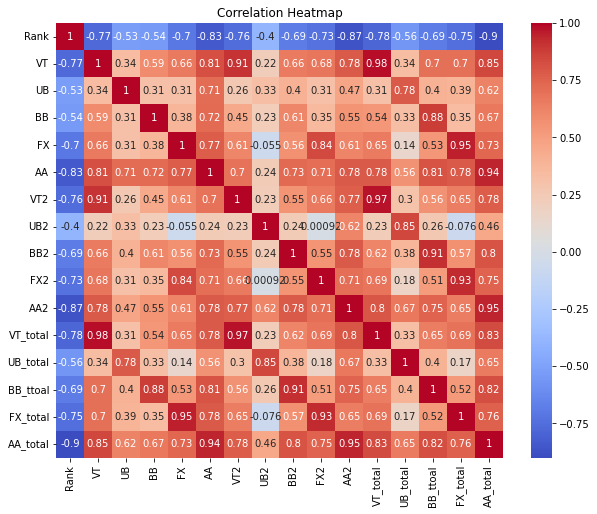

In [17]:
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



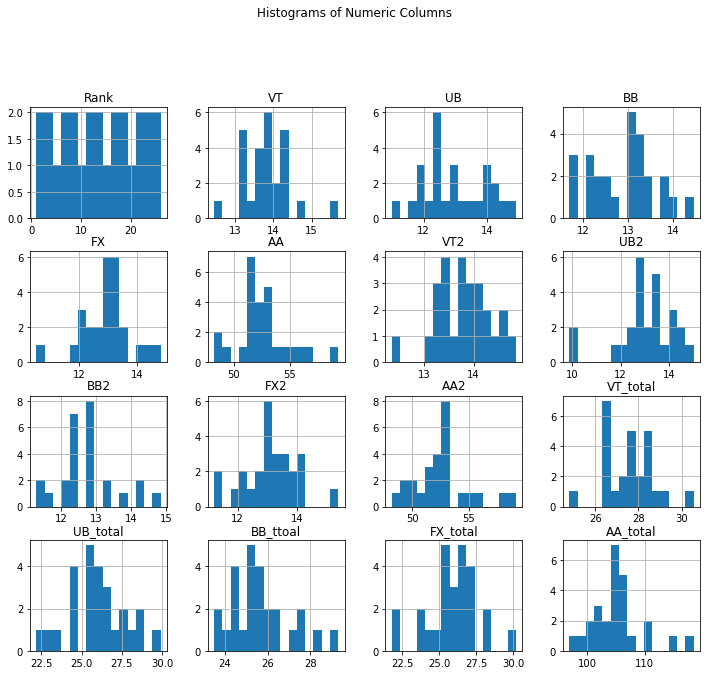

In [18]:
# Histograms for numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols].hist(bins=15, figsize=(12, 10))
plt.suptitle('Histograms of Numeric Columns', y=1.02)
plt.show()


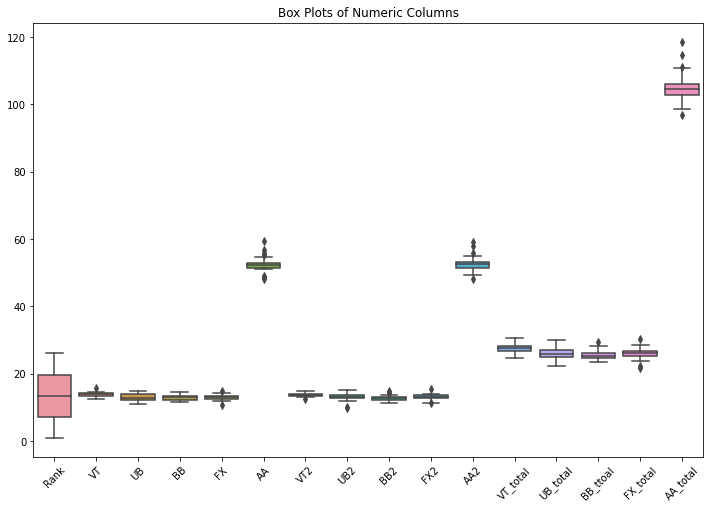

In [19]:

# Box plots for numeric columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_cols])
plt.title('Box Plots of Numeric Columns')
plt.xticks(rotation=45)
plt.show()



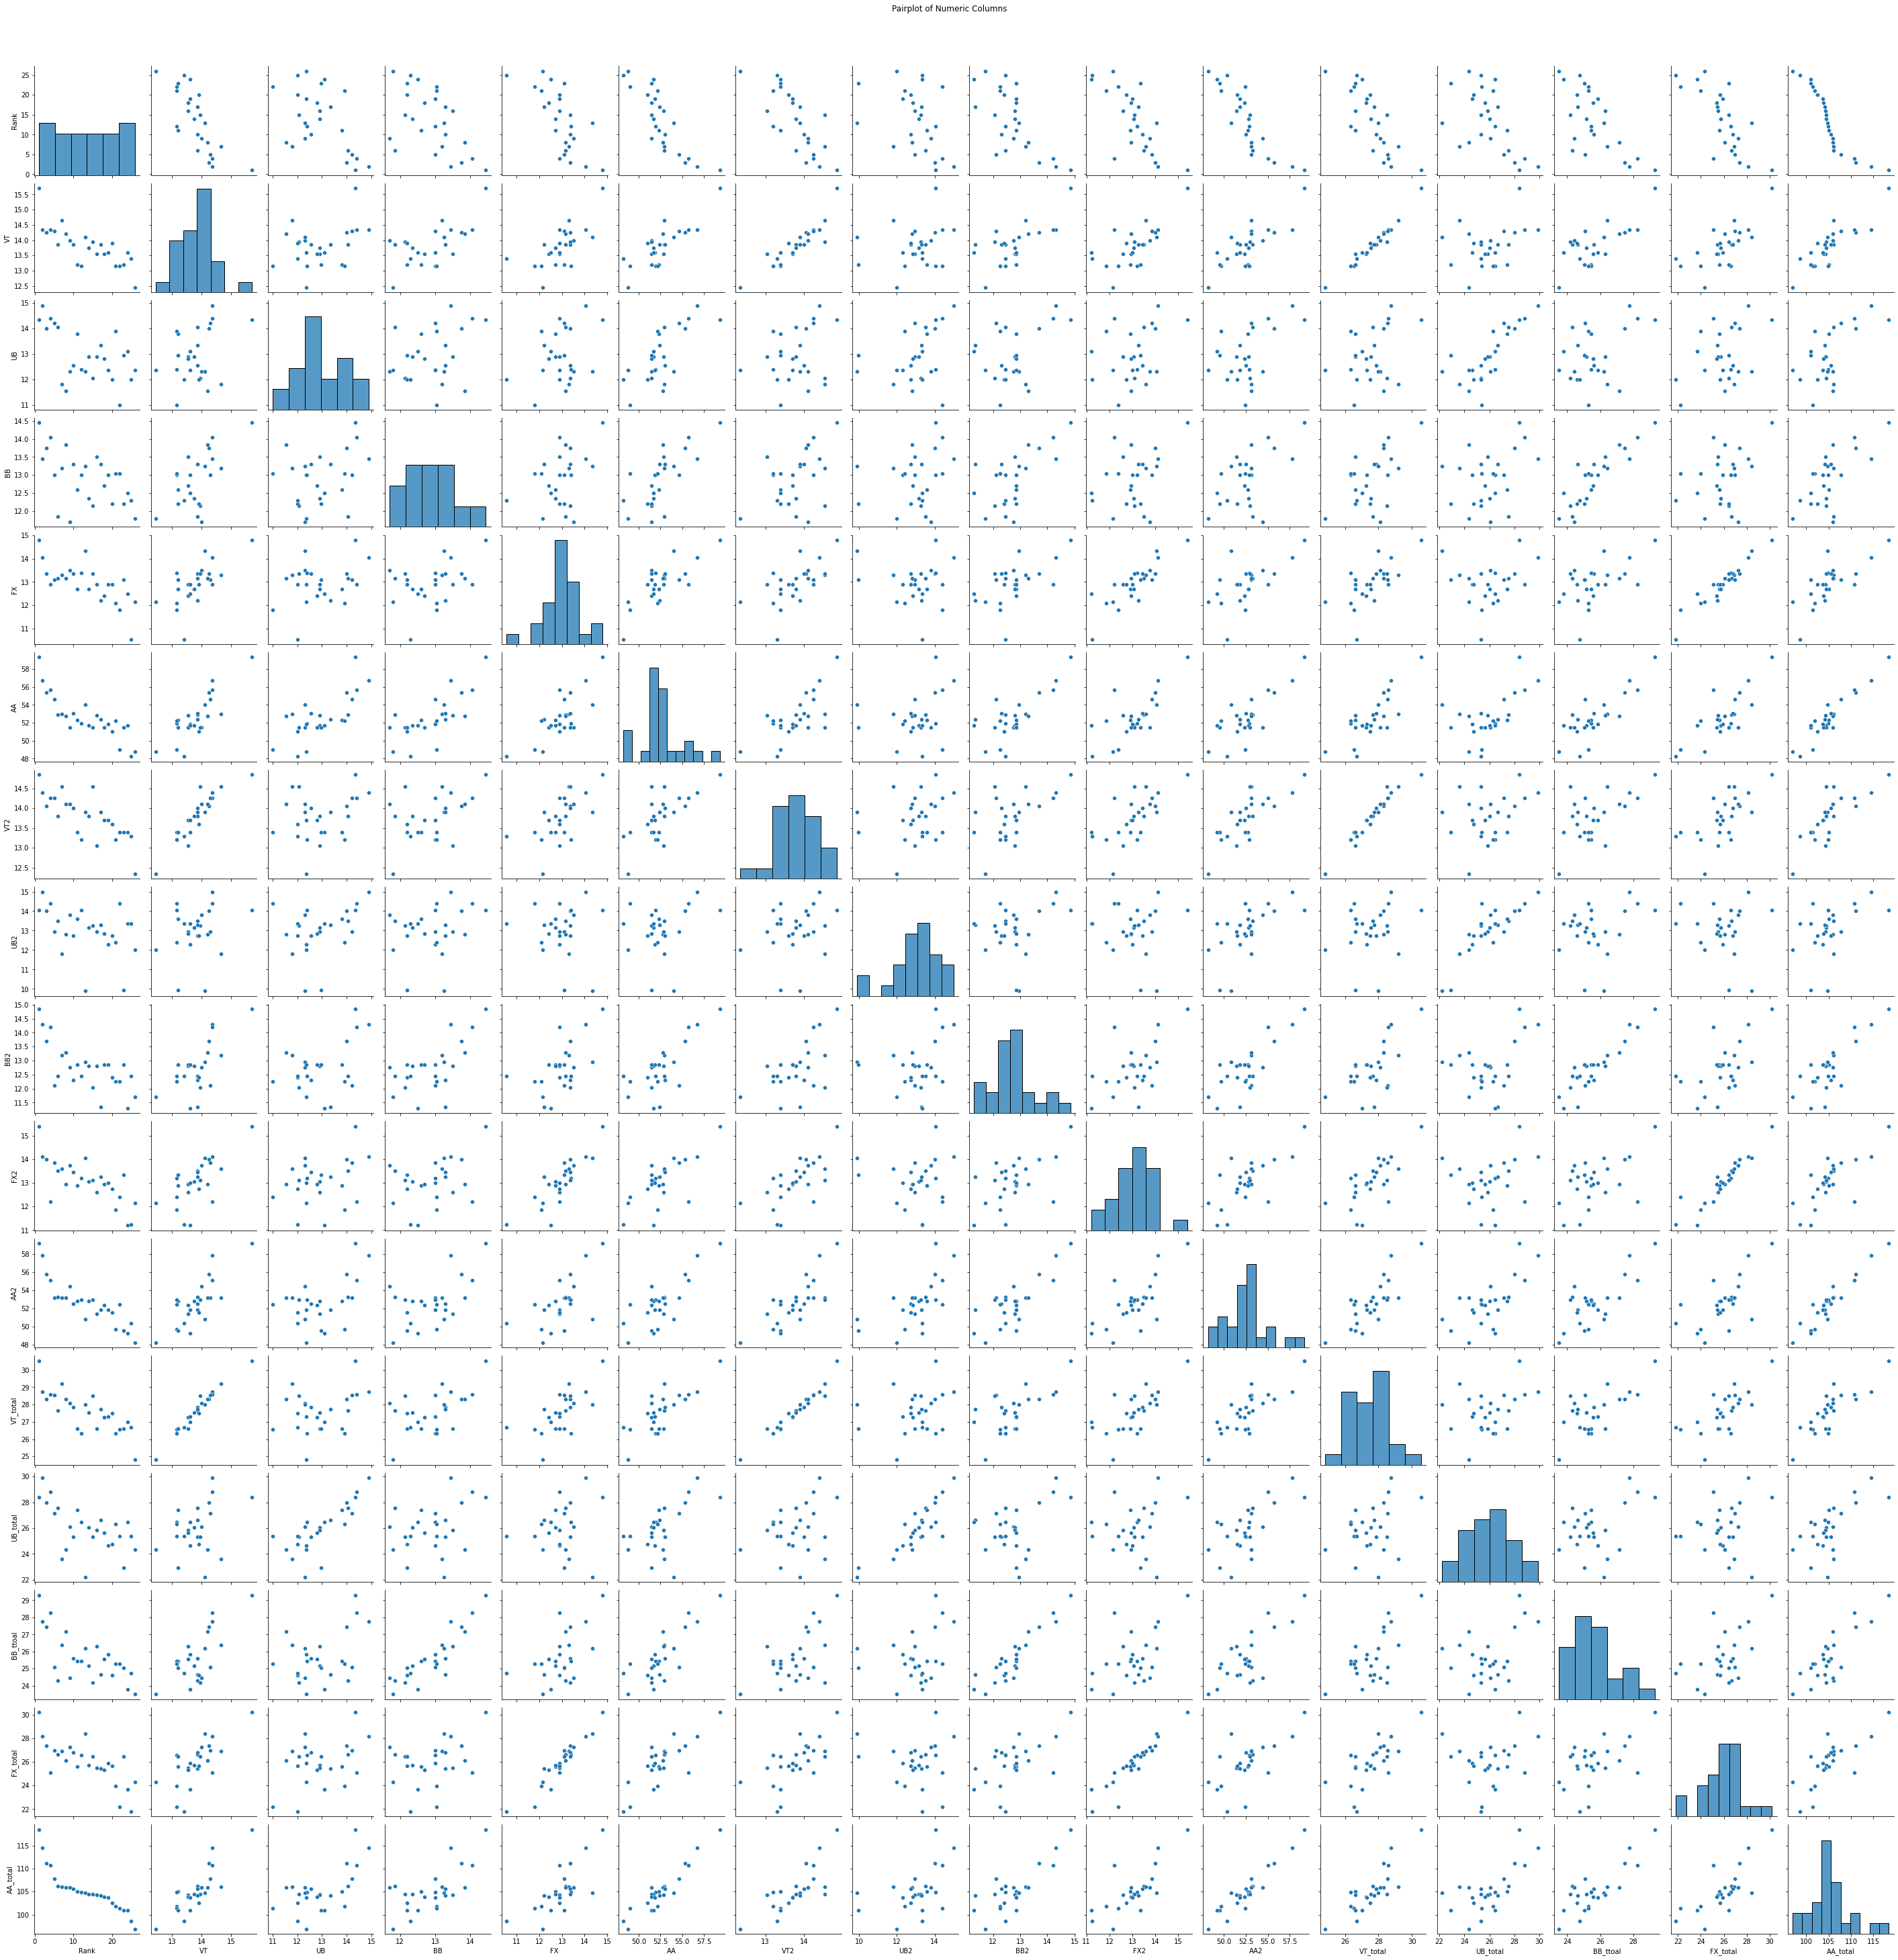

In [20]:
# Pairplot for numeric columns
sns.pairplot(df[numeric_cols])
plt.suptitle('Pairplot of Numeric Columns', y=1.02)
plt.show()



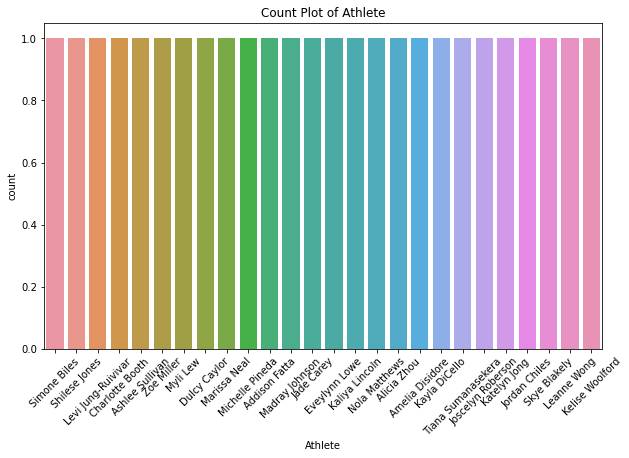

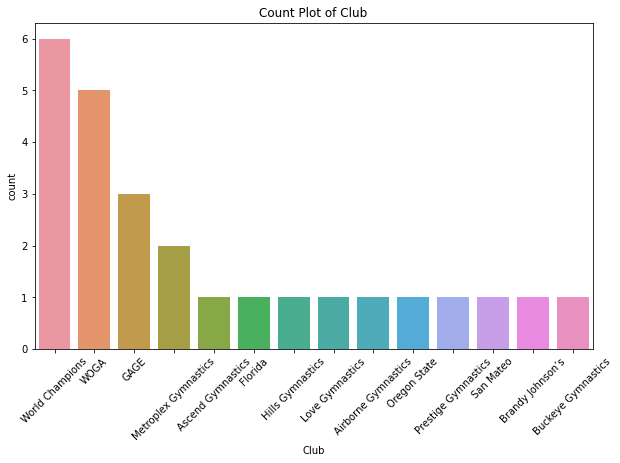

In [21]:
# Count plot for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for column in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    plt.title(f'Count Plot of {column}')
    plt.xticks(rotation=45)
    plt.show()

<Figure size 864x576 with 0 Axes>

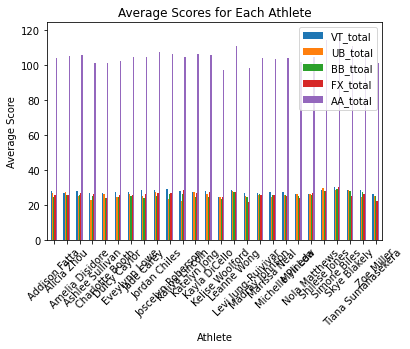

In [28]:

# Group the data by athlete
grouped_by_athlete = df.groupby('Athlete').mean()

# Select the relevant columns for plotting
score_columns = ['VT_total', 'UB_total', 'BB_ttoal', 'FX_total', 'AA_total']

# Bar plot of average scores for each athlete
plt.figure(figsize=(12, 8))
grouped_by_athlete[score_columns].plot(kind='bar')
plt.title('Average Scores for Each Athlete')
plt.ylabel('Average Score')
plt.xlabel('Athlete')
plt.xticks(rotation=45)
plt.show()

# Other visualizations using grouped data can be added here


In [24]:
df.columns

Index(['Rank', 'Athlete', 'Club', 'VT', 'UB', 'BB', 'FX', 'AA', 'VT2', 'UB2',
       'BB2', 'FX2', 'AA2', 'VT_total', 'UB_total', 'BB_ttoal', 'FX_total',
       'AA_total'],
      dtype='object')

<Figure size 1296x720 with 0 Axes>

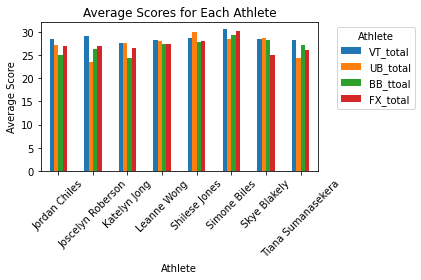

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Select the first 5 athletes
# first_5_athletes = df.head(5)

first5 = df.iloc[:8]

# Group the data by athlete
grouped_by_athlete = first5.groupby('Athlete').mean()

# Select the relevant columns for plotting
score_columns = ['VT_total', 'UB_total', 'BB_ttoal', 'FX_total']


# Bar plot of average scores for each athlete
plt.figure(figsize=(18, 10))
grouped_by_athlete[score_columns].plot(kind='bar')
plt.title('Average Scores for Each Athlete')
plt.ylabel('Average Score')
plt.xlabel('Athlete')
plt.xticks(rotation=45)
# plt.show()



# Move the legend outside of the plot area
plt.legend(title='Athlete', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()  # Ensures proper spacing of elements
plt.show()